In [1]:
import matplotlib.pyplot as plt
import numpy as np
from gundata import gundata
import pandas as pd
from collections import Counter
import operator
import collections

In [2]:
years = ['2014', '2015', '2016', '2017', '2018']
Mass_Shootings = list()
for i in years:
    Mass_Shootings.append(gundata(pd.read_csv(f"DataSet/Mass_Shootings_{i}.csv"), 'Mass_Shootings'))
    
School_Shootings = list()
for i in years:
    School_Shootings.append(gundata(pd.read_csv(f"DataSet/School_Shootings_{i}.csv"), 'Mass_Shootings'))
    
Officers_Shootings = list()
for i in years:
    Officers_Shootings.append(gundata(pd.read_csv(f"DataSet/Officers_Shootings_{i}.csv"), 'Mass_Shootings'))

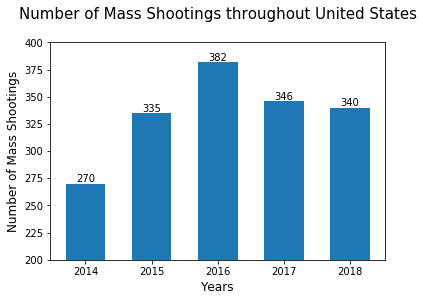

In [3]:
no_incidents_ms = list()
for i in range(len(Mass_Shootings)):
    no_incidents_ms.append(Mass_Shootings[i].get_total_incidents())

plt.bar(years, no_incidents_ms, label = "Number of Mass Shootings throughout United States", width = 0.6)
labels = list()
for i in range(len(Mass_Shootings)):
    labels.append(str(no_incidents_ms[i]))
for i in range(len(Mass_Shootings)):
    plt.text(x = years[i] , y = no_incidents_ms[i]+1.5, s = labels[i], size = 10, horizontalalignment='center')

plt.ylim(200, 400)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Number of Mass Shootings", fontsize = 12)
plt.title("Number of Mass Shootings throughout United States\n", fontsize = 15)
plt.show()

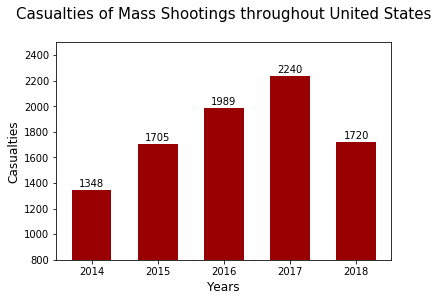

In [4]:
no_casualties_ms = list()
for i in range(len(Mass_Shootings)):
    no_casualties_ms.append(Mass_Shootings[i].count_casualties())

plt.bar(years, no_casualties_ms, label = "Casualties of Mass Shootings throughout United States", width = 0.6, color = 'xkcd:blood red')
labels = list()
for i in range(len(Mass_Shootings)):
    labels.append(str(no_casualties_ms[i]))
for i in range(len(Mass_Shootings)):
    plt.text(x = years[i] , y = no_casualties_ms[i] + 25, s = labels[i], size = 10, horizontalalignment='center')

plt.ylim(800, 2500)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Casualties", fontsize = 12)
plt.title("Casualties of Mass Shootings throughout United States\n", fontsize = 15)
plt.show()

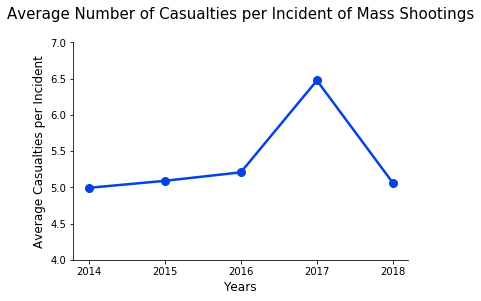

In [5]:
casualties_incidents_ratio_ms = list()
for i in range(len(no_casualties_ms)):
    casualties_incidents_ratio_ms.append(no_casualties_ms[i] / no_incidents_ms[i])

plt.plot(years, casualties_incidents_ratio_ms, label = "Average number of casualties per incident of Mass Shootings", marker = "o", markersize = 8, color = 'xkcd:blue', linewidth = 2.5)
plt.ylim(4,7)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Average Casualties per Incident", fontsize = 12)
plt.title("Average Number of Casualties per Incident of Mass Shootings\n", fontsize = 15)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

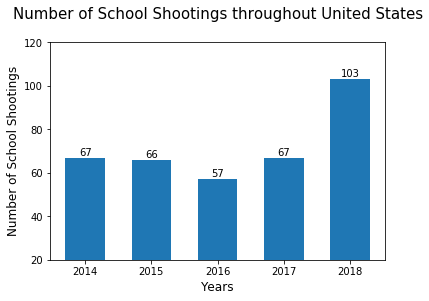

In [15]:
no_incidents_ss = list()
for i in range(len(School_Shootings)):
    no_incidents_ss.append(School_Shootings[i].get_total_incidents())

plt.bar(years, no_incidents_ss, label = "Number of School Shootings throughout United States", width = 0.6)
labels = list()
for i in range(len(School_Shootings)):
    labels.append(str(no_incidents_ss[i]))
for i in range(len(School_Shootings)):
    plt.text(x = years[i] , y = no_incidents_ss[i] + 1, s = labels[i], size = 10, horizontalalignment='center')
    
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 6
#fig_size[1] = 6
#plt.rcParams["figure.figsize"] = fig_size
plt.ylim(20, 120)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Number of School Shootings", fontsize = 12)
plt.title("Number of School Shootings throughout United States\n", fontsize = 15)
plt.show()

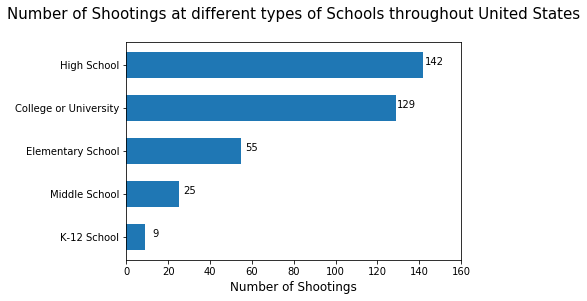

In [21]:
list_of_dicts = list()
for i in range(len(School_Shootings)):
    list_of_dicts.append(School_Shootings[i].count_by_columns("School Type"))
temp = Counter()
for i in range(len(list_of_dicts)):
    temp += Counter(list_of_dicts[i])
final_counts = dict(temp)
sorted_count = sorted(final_counts.items(), key=operator.itemgetter(1))
sorted_final_counts = collections.OrderedDict(sorted_count)
plt.barh(list(sorted_final_counts.keys()), list(sorted_final_counts.values()), height = 0.6)
labels = list()
list_counts = list(sorted_final_counts.values())
list_types = list(sorted_final_counts.keys())
for i in range(len(list_counts)):
    labels.append(str(list_counts[i]))
for i in range(len(list_counts)):
    plt.text(x = list_counts[i]+5 , y = list_types[i], s = labels[i], size = 10, horizontalalignment='center')
    
plt.xlim(0,160)
plt.xlabel("Number of Shootings", fontsize = 12)
#plt.ylabel("Type of School", fontsize = 12)
plt.title("Number of Shootings at different types of Schools throughout United States\n", fontsize = 15)
plt.show()

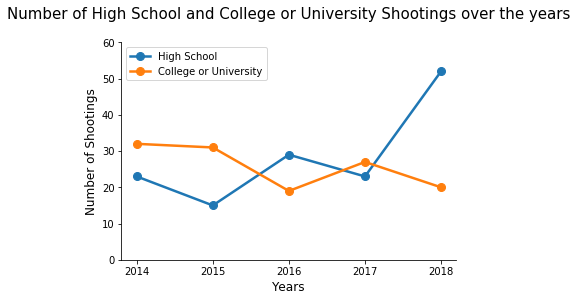

In [35]:
hs_killings = list()
cu_killings = list()
for i in range(len(list_of_dicts)):
    hs_killings.append(list_of_dicts[i]['High School'])
    cu_killings.append(list_of_dicts[i]['College or University'])

plt.plot(years, hs_killings, cu_killings, label = "Number of High School and College or University Shootings over the years", marker = "o", markersize = 8, linewidth = 2.5)
plt.ylim(0,60)
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Number of Shootings", fontsize = 12)
plt.title("Number of High School and College or University Shootings over the years\n", fontsize = 15)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(['High School', 'College or University'], loc = 'best')
plt.show()